In [1]:
#Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#this allows plots to be displayed in line
%matplotlib inline 

df = pd.read_csv("tournaments-fixed2.csv", encoding='latin-1')
print(df.head())

#how to figure out if what type of object is "StartDate"??? :D
foo = df.iloc[0]; 
print(foo.StartDate.__class__)

   GameId                     TournamentName   StartDate     EndDate  \
0     151          GSL January 2011 (Code S)  2011-01-02  2011-01-29   
1     151          GSL January 2011 (Code A)  2011-01-02  2011-01-29   
2     151            GSL March 2011 (Code S)  2011-02-21  2011-03-19   
3     151            GSL March 2011 (Code A)  2011-02-21  2011-03-19   
4     151  GSL World Championship Seoul 2011  2011-03-28  2011-04-09   

            Location  Teamplay  TotalUSDPrize  
0  Seoul South Korea         0      118364.41  
1  Seoul South Korea         0       11567.43  
2  Seoul South Korea         0      116046.45  
3  Seoul South Korea         0       11471.31  
4  Seoul South Korea         0       97882.00  
<class 'str'>


In [2]:
## Create a new column

#Change StartDate from str -> datetime
df['StartDate'] = pd.to_datetime(df['StartDate'], format = '%Y-%m-%d')
foo = df.iloc[0]; 
print('type of class:',foo.StartDate.__class__)

#Change EndDate from str -> datetime
df['EndDate'] = pd.to_datetime(df['EndDate'], format = '%Y-%m-%d')

#Create a new column with the start year
df['Year'] = pd.DatetimeIndex(df['StartDate']).year

#Create a new column with the start Month
df['StartMonth'] = pd.DatetimeIndex(df['StartDate']).month

#Duration
df['Duration'] = df['EndDate'] - df['StartDate']

#Offline/Online
df['OnOff'] = df['Location'].str.contains('Online')

df.head()


type of class: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


,GameId,TournamentName,StartDate,EndDate,Location,Teamplay,TotalUSDPrize,Year,StartMonth,Duration,OnOff
0,151,GSL January 2011 (Code S),2011-01-02,2011-01-29,Seoul South Korea,0,118364.41,2011,1,27 days,False
1,151,GSL January 2011 (Code A),2011-01-02,2011-01-29,Seoul South Korea,0,11567.43,2011,1,27 days,False
2,151,GSL March 2011 (Code S),2011-02-21,2011-03-19,Seoul South Korea,0,116046.45,2011,2,26 days,False
3,151,GSL March 2011 (Code A),2011-02-21,2011-03-19,Seoul South Korea,0,11471.31,2011,2,26 days,False
4,151,GSL World Championship Seoul 2011,2011-03-28,2011-04-09,Seoul South Korea,0,97882.00,2011,3,12 days,False


# 02/15/2020

In [3]:
df_test = df.sample(6)

In [4]:
#geocoder allow stuff
import geocoder

geocode_result = geocoder.geocodefarm('Raleigh North Carolina USA')
reverse_geocode_result = geocoder.geocodefarm(geocode_result, method='reverse')

reverse_geocode_result.country

#create a function that outputs the country and use apply()
def country_extracter(location): 
    geocode_result = geocoder.geocodefarm(location) 
    reverse_geocode_result = geocoder.geocodefarm(geocode_result, method='reverse') 
    return reverse_geocode_result.country

#df_test['Country'] = df_test['Location'].apply(country_extracter)



In [5]:
#split string
#df['Location'].str.split()
#South Korea, NA, Europe, China, Other (Singapore, ...)

#1. group all US/USA/NA/North America
#2. Any countries with two names (South Korea) need to be together
#3. (Online) is omitted
#Only upto state, no town (ex. Raleigh)

In [6]:
#split 
df_C = pd.read_csv("countries.csv", encoding="utf-16")

#You want to split the location string and 
df_split = df_test['Location'].str.split()
df_split
#look-up the last part ( first ) in that country CSV
x = (df_C[df_C['Country'] == "Sweden"]) 
#finding category
y = x.iat[0,1] 
print(y)
x

#Jinri had brain dead time :'( So could not finish 

0


,Country,Category
178,Sweden,0


# 02/17/2020

In [7]:
df_update = pd.read_csv("tournamentscountry.csv", encoding = "latin_1", delimiter = '\t')
#df_update.head()

In [8]:
## Create a new column

#Change StartDate from str -> datetime
df_update['StartDate'] = pd.to_datetime(df_update['StartDate'], format = '%Y-%m-%d')

#Change EndDate from str -> datetime
df_update['EndDate'] = pd.to_datetime(df_update['EndDate'], format = '%Y-%m-%d')

#Create a new column with the start year
df_update['Year'] = pd.DatetimeIndex(df_update['StartDate']).year

#Create a new column with the start Month
df_update['StartMonth'] = pd.DatetimeIndex(df_update['StartDate']).month

#Duration
df_update['Duration'] = df_update['EndDate'] - df_update['StartDate']

#Offline/Online
df_update['OnOff'] = df_update['Location'].str.contains('Online')

print(df_update.shape)
df_update.head()

(35965, 13)


,TournamentId,GameId,TournamentName,StartDate,EndDate,Location,Teamplay,TotalUSDPrize,Country,Year,StartMonth,Duration,OnOff
0,1000,151,GSL January 2011 (Code S),2011-01-02,2011-01-29,"Seoul, South Korea",0,118364.41,South Korea,2011,1,27 days,False
1,1001,151,GSL January 2011 (Code A),2011-01-02,2011-01-29,"Seoul, South Korea",0,11567.43,South Korea,2011,1,27 days,False
2,1002,151,GSL March 2011 (Code S),2011-02-21,2011-03-19,"Seoul, South Korea",0,116046.45,South Korea,2011,2,26 days,False
3,1003,151,GSL March 2011 (Code A),2011-02-21,2011-03-19,"Seoul, South Korea",0,11471.31,South Korea,2011,2,26 days,False
4,1004,151,GSL World Championship Seoul 2011,2011-03-28,2011-04-09,"Seoul, South Korea",0,97882.00,South Korea,2011,3,12 days,False


In [9]:
#maybe use later keep!!!!!
df_twitch = pd.read_csv("twitch_tournament.csv")
print(df_twitch.shape)
#df_twitch.head()


(4258, 10)


In [10]:
df1 = df_update.groupby('StartMonth').count()
df1.dtypes 

TournamentId      int64
GameId            int64
TournamentName    int64
StartDate         int64
EndDate           int64
Location          int64
Teamplay          int64
TotalUSDPrize     int64
Country           int64
Year              int64
Duration          int64
OnOff             int64
dtype: object

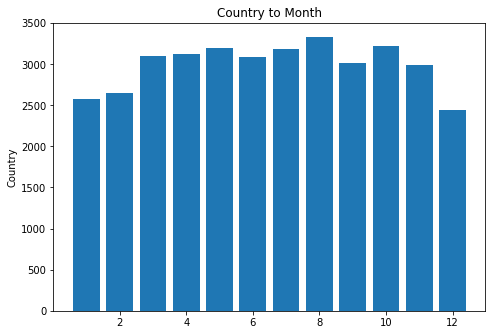

In [14]:
#Data Analysis-? - Jinri will make graphs and scatterplots etc to show 
import matplotlib.pyplot as plt
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
# In bar graph form, how many countries have had their tournaments held!? :D
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,df1['Country'])
plt.ylabel('Country')
plt.title('Country to Month')

plt.show()


In [34]:
#For next week Monday
#One thing that might be interesting to look at is to see the amount of tournaments over time for 
#the 20(?) games with the most prize money 

df_gameID_sum = df_update.groupby('GameId').sum()
df_gameID_sum
df_update[df_update['GameId']=245]
#df_gameID = df_gameID.sort_values(by='TournamentId',ascending=False)

#df_gameID['GameID'] = d_gameID.index
#df_gameID
#amount of tournaments every month
#df_2 = 

,TournamentId,Teamplay,TotalUSDPrize,Year,StartMonth
GameId,,,,,
151,82044529,197,31283043.24,11270065,36548
152,7964103,40,8092479.49,1127849,3888
153,467677,23,299281.00,78143,268
154,410403,35,1489362.47,142402,500
155,402331,33,2106479.40,76418,239
156,217648,24,772089.97,56315,165
157,2638385,31,682294.04,825137,2523
158,18142214,85,5614922.82,2641352,8877
159,625942,22,1137832.19,200352,715
